# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [19]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
print(data[:5,:])
print(target[:5])
print(coef)

[[-1.13431848 -0.70742089]
 [-0.27617949 -0.51688389]
 [-0.46200535  0.35088849]
 [ 0.36505352  0.77408203]
 [-1.02141473  0.4323957 ]]
[-45.38589148 -10.29545833 -21.47606913  11.96165156 -42.44469577]
[38.07925837  0.        ]


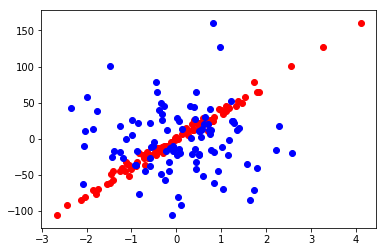

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [39]:
print test_data
print train_labels

[[-0.90224607 -0.59097228]
 [-0.71925384 -0.58341459]
 [ 1.46767801 -0.33567734]
 [ 0.75196485 -0.99376098]
 [-0.18325657  1.01985473]
 [-0.65325027  0.84245628]
 [ 0.39652016 -0.31461744]
 [ 0.21611601 -1.85861239]
 [-0.82913529  0.08771022]
 [-0.46834626 -1.25472031]
 [-1.22142917  1.80447664]
 [ 0.12482365  0.75650214]
 [ 0.36505352  0.77408203]
 [ 0.18040981  0.55316427]
 [ 0.38047197 -0.21713527]
 [-0.1144213  -0.49817419]
 [-0.26905696  2.23136679]
 [-1.86809065  1.73118467]
 [ 1.10914328 -1.76491773]
 [-0.87810789 -0.15643417]
 [ 0.24143963  0.49742565]
 [ 1.00036589 -0.38109252]
 [ 0.60151581  0.00365949]
 [-0.38151648  0.06648901]
 [-0.27617949 -0.51688389]
 [ 0.20420798  1.40669624]
 [-0.67767558 -1.43943903]
 [-0.46200535  0.35088849]
 [ 1.36723542  1.21788563]
 [-0.30408644  2.58529487]]
[ -17.27897399  -76.75213382  -36.69728864   34.35183007  -22.64686884
   -1.42235396  -35.32062686  -22.32195021  126.64909941  -63.4056294
  -16.65927231  -80.80239408  -10.06708677  -13.

In [8]:
print predictions

[-35.99772411 -28.96587308  55.1532512   27.3239406   -7.54756044
 -25.69011721  14.02574532   6.29499328 -32.83723375 -19.67841467
 -47.01151868   4.14760989  13.38291363   6.17677943  13.46005468
  -5.69263407 -10.21330097 -71.88501484  40.6409133  -34.84490727
   8.49170518  37.18225719  22.06409355 -15.6571959  -11.91477395
   7.53423785 -27.813806   -18.60065077  52.10289015 -11.37473582]


In [20]:
metrics.mean_absolute_error(test_labels, predictions)

3.8783837978008076

In [21]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


mean: -4.07007149878, std: 1.07371044929


In [22]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [23]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [24]:
coef

array([38.07925837,  0.        ])

In [25]:
linear_regressor.coef_

array([38.40558892,  0.51957703])

In [26]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-1.0393768989144767

In [27]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [28]:
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_)

y = 38.41*x1 + 0.52*x2 + -1.04


#### Lasso

In [37]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
print train_labels
lasso_predictions = lasso_regressor.predict(test_data)

[ -17.27897399  -76.75213382  -36.69728864   34.35183007  -22.64686884
   -1.42235396  -35.32062686  -22.32195021  126.64909941  -63.4056294
  -16.65927231  -80.80239408  -10.06708677  -13.26392817  -57.46293828
   11.06961035 -105.77758163   17.64282734  -44.51417742   64.70214251
   45.05465366  -32.71074998   13.31981235    0.34799656   18.17188553
  -12.98848753  160.09441244  -16.30914909  -36.44717565  -16.79027112
   19.66406455  -70.11132234  -45.27502383  -45.38589148  -10.27758354
   21.20540389   64.19559505   22.13032804  -61.47026695  101.14760598
  -91.477377     24.47584129   -0.74051877   27.83791274   20.87713077
  -16.85466265  -48.28700118  -14.97110322   44.41658249   44.66274342
    1.72644759   29.8208999   -52.37232463   23.87701013   58.26281761
  -11.18242389   13.02656201  -84.32102748   41.95683853   24.82763821
   41.1068411   -22.33224966   11.74073026  -27.02798161    4.45578287
  -42.44469577   12.47089016  -21.48288019   22.2276832    78.24817537]


In [30]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
print train_labels
lasso_predictions = lasso_regressor.predict(test_data)

mean: 4.15447824667, std: 1.0170354385


In [34]:
print lasso_regressor.coef_

[37.76750916  0.        ]


In [35]:
lasso_regressor.intercept_

-1.04809012406358

In [32]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [36]:
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1],
                                                 lasso_regressor.intercept_)

y = 37.77*x1 + 0.00*x2 + -1.05
